### Import Dependencies 

In [98]:
# Import libraries and dependencies
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline



### Load Environment Variables and Set Up Alpaca Environment

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

### Create Alpaca API Environment

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Set Timeframe, Start Date and End Date

In [4]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2015-11-02", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-11-02", tz="America/New_York").isoformat()

### Define Function that Returns a Data Frame from Alpaca for the List of Securities

In [5]:
# Get 10 year's worth of historical price data
def alpaca_df(tickers):
    df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
    ).df
    
    return df_ticker

### International Portfolios (iShare Asset Allocation ETFs with Global Scope and Automatic Rebalancing)

In [6]:
#70% in Stocks and 30% in Bonds
#International Core Conservative Allocation:
#Tickers
intl_cc = ["AOK"]
#Weights
intl_cc_w = [1.0]

#60% in Bonds and 40% in Stocks
#International Core Moderate Allocation:
#Tickers
intl_cm = ["AOM"]
#Weights
intl_cm_w = [1.0]

#60% in Stocks and 40% in Bonds
#International Core Growth Allocation:
#Tickers
intl_cg = ["AOR"]
#Weights
intl_cg_w = [1.0]

#80% in Stocks and 20% in Bonds
#International Core Aggressive Allocation:
#Tickers
intl_ca = ["AOA"]
#Weights
intl_ca_w = [1.0]

#100% in stocks
# Core S&P Total U.S. Stock Market 
# Tickers
intl_cs = ["ITOT"]
#Weights
intl_cs_w = [1.0]

### Create Data Frames for All Portfolios

In [7]:
'INTERNATIONAL'
# intl_core_conservative_all = ["AOK"]
tickers = intl_cc
intl_cc_df=alpaca_df(tickers)
# intl_cc_df.head()

# intl_core_moderate_all = ["AOM"]
tickers = intl_cm
intl_cm_df=alpaca_df(tickers)
# intl_cm_df.head()

# intl_core_growth_all = ["AOR"]
tickers = intl_cg
intl_cg_df=alpaca_df(tickers)
# intl_cg_df.head()

# intl_core_aggressive_all = ["AOA"]
tickers = intl_ca
intl_ca_df=alpaca_df(tickers)
# intl_ca_df.head()

# intl_core_equity_all = ["ITOT"]
tickers = intl_cs
intl_cs_df=alpaca_df(tickers)
# intl_cs_df.head()



### Set Parmeters for Monte Carlo Simulations

In [8]:
#Number of Simulations
ns=500

#Number of Trading Days
ntd=252*1

# Set initial investment
initial_investment = 10000

### Run the Monte Carlo Simulation

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

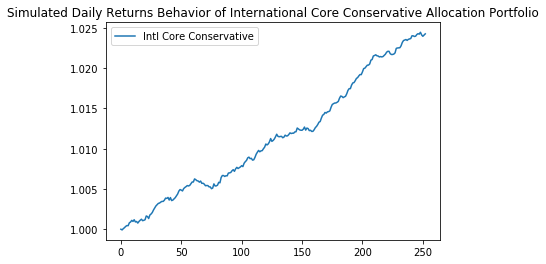

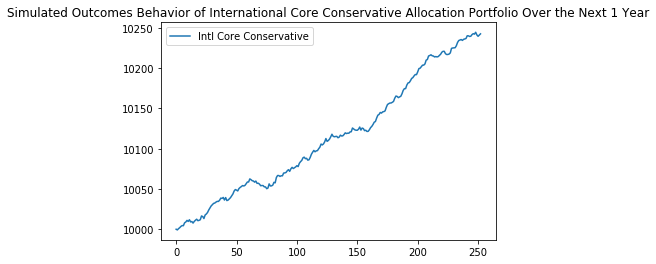

In [9]:
#1
'INTERNATIONAL'
# intl_core_conservative_all = ["AOK"]
# intl_cc_df
# intl_cc_w

intl_cc_title="International Core Conservative Allocation"

MC_INTL_CC = MCSimulation(
    portfolio_data = intl_cc_df,
    weights = intl_cc_w,
    num_simulation = ns,
    num_trading_days = ntd
)

# Run a Monte Carlo simulation to forecast cumulative returns
MC_INTL_CC.calc_cumulative_return()

# Fetch summary statistics from the Monte Carlo simulation results
intl_cc_tbl = MC_INTL_CC.summarize_cumulative_return()

# Compute mean from the simulated daily returns
intl_cc_MEAN_returns_data = {"mean": list(MC_INTL_CC.simulated_return.mean(axis=1)),}

# Create a DataFrame with the mean statistics
intl_cc_simulated_MEAN_returns_df = pd.DataFrame(intl_cc_MEAN_returns_data)
intl_cc_simulated_MEAN_returns_df=intl_cc_simulated_MEAN_returns_df.rename(columns={"mean":"Intl Core Conservative"})


# Use the `plot` function to visually analyze the trajectory 
intl_cc_simulated_MEAN_returns_df.plot(title=f"Simulated Daily Returns Behavior of {intl_cc_title} Portfolio")

# Multiply an initial investment by the daily returns of simulated stock prices to return the progression of daily returns in terms of money
intl_cc_cumulative_pnl = initial_investment * intl_cc_simulated_MEAN_returns_df

# Use the 'plot' function to create a chart of the simulated profits/losses
intl_cc_cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {intl_cc_title} Portfolio Over the Next 1 Year")

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

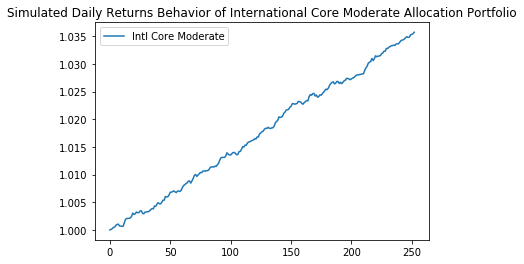

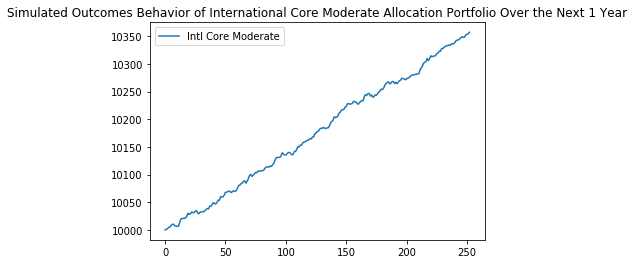

In [10]:
#2
'INTERNATIONAL'
# intl_core_moderate_all = ["AOM"]
# intl_cc_df
# intl_cc_w

intl_cm_title="International Core Moderate Allocation"

MC_INTL_CM = MCSimulation(
    portfolio_data = intl_cm_df,
    weights = intl_cm_w,
    num_simulation = ns,
    num_trading_days = ntd
)

# Run a Monte Carlo simulation to forecast cumulative returns
MC_INTL_CM.calc_cumulative_return()

# Fetch summary statistics from the Monte Carlo simulation results
intl_cm_tbl = MC_INTL_CM.summarize_cumulative_return()

# Compute mean from the simulated daily returns
intl_cm_MEAN_returns_data = {"mean": list(MC_INTL_CM.simulated_return.mean(axis=1)),}

# Create a DataFrame with the mean statistics
intl_cm_simulated_MEAN_returns_df = pd.DataFrame(intl_cm_MEAN_returns_data)
intl_cm_simulated_MEAN_returns_df=intl_cm_simulated_MEAN_returns_df.rename(columns={"mean":"Intl Core Moderate"})


# Use the `plot` function to visually analyze the trajectory 
intl_cm_simulated_MEAN_returns_df.plot(title=f"Simulated Daily Returns Behavior of {intl_cm_title} Portfolio")

# Multiply an initial investment by the daily returns of simulated stock prices to return the progression of daily returns in terms of money
intl_cm_cumulative_pnl = initial_investment * intl_cm_simulated_MEAN_returns_df

# Use the 'plot' function to create a chart of the simulated profits/losses
intl_cm_cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {intl_cm_title} Portfolio Over the Next 1 Year")

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

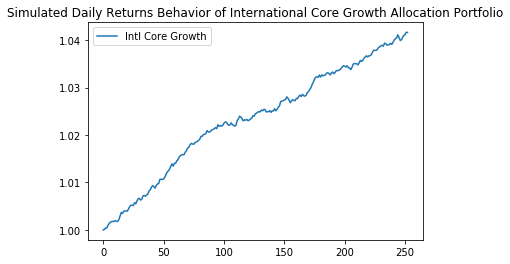

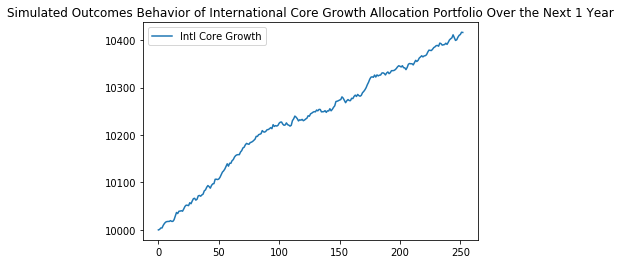

In [11]:
#3
'INTERNATIONAL'
# intl_core_growth_all = ["AOR"]
# intl_cg_df
# intl_cg_w

intl_cg_title="International Core Growth Allocation"

MC_INTL_CG = MCSimulation(
    portfolio_data = intl_cg_df,
    weights = intl_cg_w,
    num_simulation = ns,
    num_trading_days = ntd
)

# Run a Monte Carlo simulation to forecast cumulative returns
MC_INTL_CG.calc_cumulative_return()

# Fetch summary statistics from the Monte Carlo simulation results
intl_cg_tbl = MC_INTL_CG.summarize_cumulative_return()

# Compute mean from the simulated daily returns
intl_cg_MEAN_returns_data = {"mean": list(MC_INTL_CG.simulated_return.mean(axis=1)),}

# Create a DataFrame with the mean statistics
intl_cg_simulated_MEAN_returns_df = pd.DataFrame(intl_cg_MEAN_returns_data)
intl_cg_simulated_MEAN_returns_df=intl_cg_simulated_MEAN_returns_df.rename(columns={"mean":"Intl Core Growth"})

# Use the `plot` function to visually analyze the trajectory 
intl_cg_simulated_MEAN_returns_df.plot(title=f"Simulated Daily Returns Behavior of {intl_cg_title} Portfolio")

# Multiply an initial investment by the daily returns of simulated stock prices to return the progression of daily returns in terms of money
intl_cg_cumulative_pnl = initial_investment * intl_cg_simulated_MEAN_returns_df

# Use the 'plot' function to create a chart of the simulated profits/losses
intl_cg_cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {intl_cg_title} Portfolio Over the Next 1 Year")

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

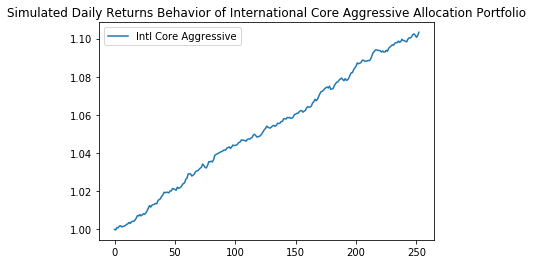

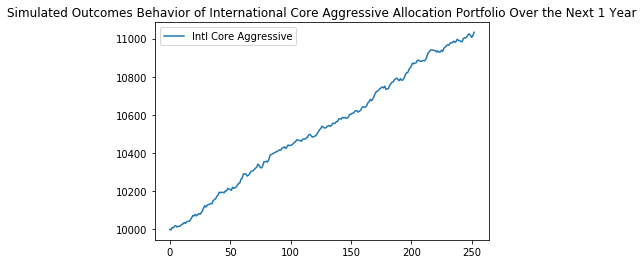

In [12]:
#4
'INTERNATIONAL'
# intl_core_aggressive_all = ["AOK"]
# intl_ca_df
# intl_ca_w

intl_ca_title="International Core Aggressive Allocation"

MC_INTL_CA = MCSimulation(
    portfolio_data = intl_ca_df,
    weights = intl_ca_w,
    num_simulation = ns,
    num_trading_days = ntd
)

# Run a Monte Carlo simulation to forecast cumulative returns
MC_INTL_CA.calc_cumulative_return()

# Fetch summary statistics from the Monte Carlo simulation results
intl_ca_tbl = MC_INTL_CA.summarize_cumulative_return()

# Compute mean from the simulated daily returns
intl_ca_MEAN_returns_data = {"mean": list(MC_INTL_CA.simulated_return.mean(axis=1)),}

# Create a DataFrame with the mean statistics
intl_ca_simulated_MEAN_returns_df = pd.DataFrame(intl_ca_MEAN_returns_data)
intl_ca_simulated_MEAN_returns_df=intl_ca_simulated_MEAN_returns_df.rename(columns={"mean":"Intl Core Aggressive"})

# Use the `plot` function to visually analyze the trajectory 
intl_ca_simulated_MEAN_returns_df.plot(title=f"Simulated Daily Returns Behavior of {intl_ca_title} Portfolio")

# Multiply an initial investment by the daily returns of simulated stock prices to return the progression of daily returns in terms of money
intl_ca_cumulative_pnl = initial_investment * intl_ca_simulated_MEAN_returns_df

# Use the 'plot' function to create a chart of the simulated profits/losses
intl_ca_cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {intl_ca_title} Portfolio Over the Next 1 Year")

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

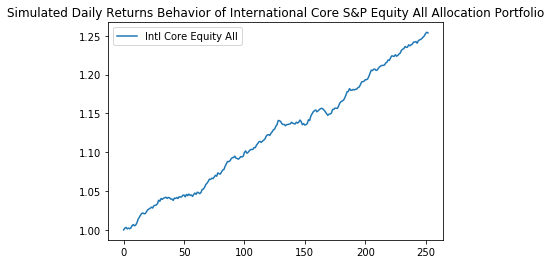

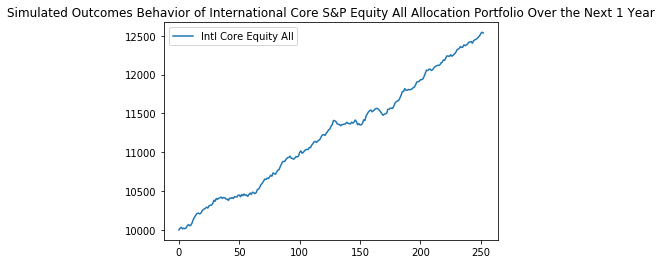

In [13]:
#5
'INTERNATIONAL'
# intl_core_equity_all = ["ITOT"]
# intl_cs_df
# intl_cs_w

intl_cs_title="International Core S&P Equity All Allocation"

MC_INTL_CS = MCSimulation(
    portfolio_data = intl_cs_df,
    weights = intl_cs_w,
    num_simulation = ns,
    num_trading_days = ntd
)

# Run a Monte Carlo simulation to forecast cumulative returns
MC_INTL_CS.calc_cumulative_return()

# Fetch summary statistics from the Monte Carlo simulation results
intl_cs_tbl = MC_INTL_CS.summarize_cumulative_return()

# Compute mean from the simulated daily returns
intl_cs_MEAN_returns_data = {"mean": list(MC_INTL_CS.simulated_return.mean(axis=1)),}

# Create a DataFrame with the mean statistics
intl_cs_simulated_MEAN_returns_df = pd.DataFrame(intl_cs_MEAN_returns_data)
intl_cs_simulated_MEAN_returns_df=intl_cs_simulated_MEAN_returns_df.rename(columns={"mean":"Intl Core Equity All"})

# Use the `plot` function to visually analyze the trajectory 
intl_cs_simulated_MEAN_returns_df.plot(title=f"Simulated Daily Returns Behavior of {intl_cs_title} Portfolio")

# Multiply an initial investment by the daily returns of simulated stock prices to return the progression of daily returns in terms of money
intl_cs_cumulative_pnl = initial_investment * intl_cs_simulated_MEAN_returns_df

# Use the 'plot' function to create a chart of the simulated profits/losses
intl_cs_cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {intl_cs_title} Portfolio Over the Next 1 Year")

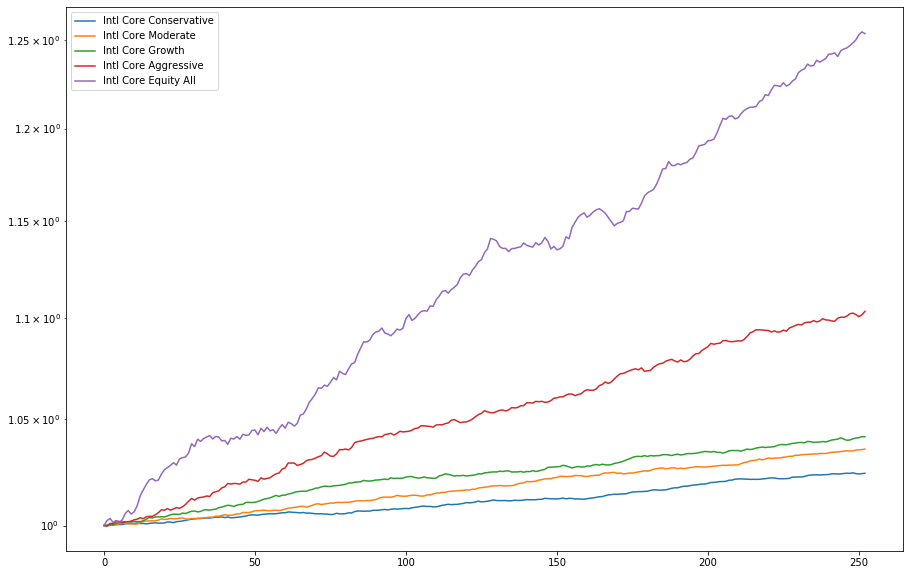

In [14]:

mean_forecasts_df = pd.concat([intl_cc_simulated_MEAN_returns_df,
                          intl_cm_simulated_MEAN_returns_df,
                          intl_cg_simulated_MEAN_returns_df,
                          intl_ca_simulated_MEAN_returns_df, 
                          intl_cs_simulated_MEAN_returns_df], axis=1, join="inner")
# new_pd = pd.concat(mean_df_list)
mean_forecasts_df.plot(figsize=(15,10), logy=True)

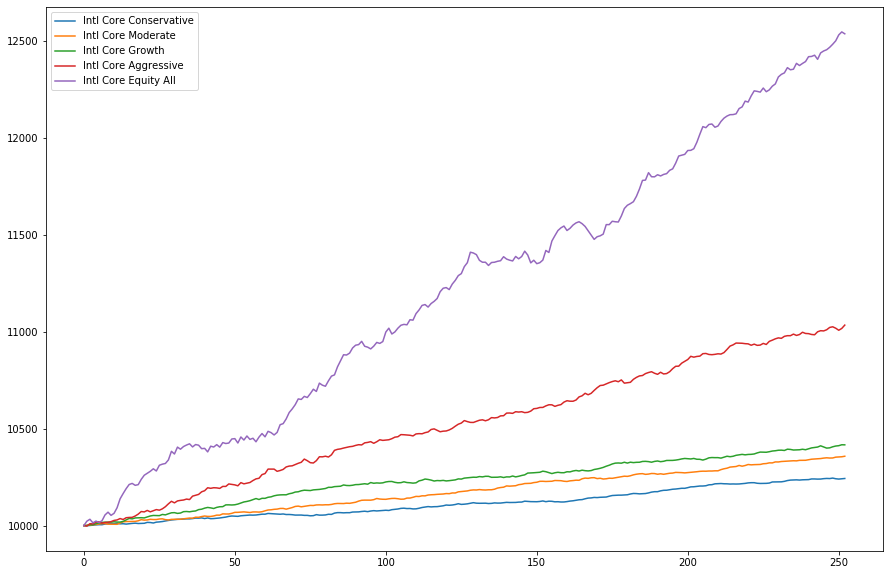

In [15]:
mean_pnl_forecasts_df = pd.concat([intl_cc_cumulative_pnl,
                          intl_cm_cumulative_pnl,
                          intl_cg_cumulative_pnl,
                          intl_ca_cumulative_pnl, 
                          intl_cs_cumulative_pnl], axis=1, join="inner")
# new_pd = pd.concat(mean_df_list)
mean_pnl_forecasts_df.plot(figsize=(15,10), logy=False)

# Portfolio Geographical Mix

### Read Files

In [ ]:
# Read in data
aok_facts = pd.read_csv(Path("AOK_holdings.csv"),skiprows=29).dropna()
aom_facts = pd.read_csv(Path("AOM_holdings.csv"),skiprows=29).dropna()
aor_facts = pd.read_csv(Path("AOR_holdings.csv"),skiprows=29).dropna()
aoa_facts = pd.read_csv(Path("AOa_holdings.csv"),skiprows=31).dropna()
itot_facts = pd.read_csv(Path("ITOT_holdings.csv"),skiprows=31).dropna()

## 1. AOK - iShares Core Conservative ETF Allocation

### Get Portfolio Geographical Mix

In [ ]:
aok_facts.head()

In [ ]:
#Calculate Geo Mix
aok_geo_mix=aok_facts[["Location","Market Value","Weight (%)"]].set_index("Location")
aok_geo_mix["Market Value"]=aok_geo_mix["Market Value"].str.replace(",","").astype('float')
aok_gm=aok_geo_mix.groupby("Location").sum().sort_values("Market Value", ascending=False).head(10)
aok_gm.head(10)

In [ ]:
#Plot Geo Mix
aok_gm.plot.pie(y="Market Value",figsize=(10,10))

In [ ]:
#Add a column with countries' ISO indeces
aok_gm_plotly=aok_gm.reset_index()

aok_gm_plotly["Country"]=["USA","JPN","CHN","GBR","FRA","CAN","DEU","CHE","AUS","ITA"]
aok_gm_plotly.head(10)

In [ ]:
# aok_gm_plotly=aok_gm.reset_index()
fig_aok_gm=px.pie(aok_gm_plotly, values="Market Value", names="Location", width=650,
    height=500, title="Core Conservative Allocation Portfolio Holdings by Country")
fig_aok_gm.show()

In [ ]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

In [ ]:
# Create a scatter mapbox to analyze neighbourhood info
import plotly.express as px
# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

In [ ]:
aok_gm_plotly.head()

In [ ]:
map_aok=px.choropleth(aok_gm_plotly, locations="Country", color="Weight (%)", title="Core Conservative Allocation Portfolio Holdings by Country")
map_aok.show()

### Get Portfolio Asset Mix

In [ ]:
aok_asset_classes=aok_facts[["Asset Class","Market Value"]].set_index("Asset Class")
aok_asset_classes["Market Value"]=aok_asset_classes["Market Value"].str.replace(",","").astype('float')
aok_ac=aok_asset_classes.groupby("Asset Class").sum().sort_values("Market Value", ascending=False).head(4)
aok_ac.head(20)

In [ ]:
aok_ac.plot.pie(y="Market Value",figsize=(10,10))

In [ ]:
aok_ac_plotly=aok_ac.reset_index()
fig_aok_ac=px.pie(aok_ac_plotly, values="Market Value", names="Asset Class", width=650,
    height=500, title="Core Conservative Allocation Portfolio Holdings by Asset Class")
fig_aok_ac.show()

## 2. AOM - iShares Core Moderate ETF Allocation

### Get Portfolio Geographical Mix

In [ ]:
aom_facts.head()

In [ ]:
#Calculate Geo Mix
aom_geo_mix=aom_facts[["Location","Market Value","Weight (%)"]].set_index("Location")
aom_geo_mix["Market Value"]=aom_geo_mix["Market Value"].str.replace(",","").astype('float')
aom_gm=aom_geo_mix.groupby("Location").sum().sort_values("Market Value", ascending=False).head(10)
aom_gm.head(10)

In [ ]:
#Plot Geo Mix
aom_gm.plot.pie(y="Market Value",figsize=(10,10))

In [ ]:
#Add a column with countries' ISO indeces
aom_gm_plotly=aom_gm.reset_index()

aom_gm_plotly["Country"]=["USA","JPN","CHN","GBR","FRA","CAN","DEU","CHE","AUS","ITA"]
aom_gm_plotly.head(10)

In [ ]:
# aom_gm_plotly=aom_gm.reset_index()
fig_aom_gm=px.pie(aom_gm_plotly, values="Market Value", names="Location", width=650,
    height=500, title="Core Moderate Allocation Portfolio Holdings by Country")
fig_aom_gm.show()

In [ ]:
map_aom=px.choropleth(aom_gm_plotly, locations="Country", color="Weight (%)", title="Core Moderate Allocation Portfolio Holdings by Country")
map_aom.show()

### Get Portfolio Asset Mix

In [ ]:
aom_asset_classes=aom_facts[["Asset Class","Market Value"]].set_index("Asset Class")
aom_asset_classes["Market Value"]=aom_asset_classes["Market Value"].str.replace(",","").astype('float')
aom_ac=aom_asset_classes.groupby("Asset Class").sum().sort_values("Market Value", ascending=False).head(4)
aom_ac.head(20)

In [ ]:
aom_ac.plot.pie(y="Market Value",figsize=(10,10))

In [ ]:
aom_ac_plotly=aom_ac.reset_index()
fig_aom_ac=px.pie(aom_ac_plotly, values="Market Value", names="Asset Class", width=650,
    height=500, title="Core Moderate Allocation Portfolio Holdings by Asset Class")
fig_aom_ac.show()

## 3. AOR - iShares Core Growth ETF Allocation

### Get Portfolio Geographical Mix

In [ ]:
aor_facts.head()

In [ ]:
#Calculate Geo Mix
aor_geo_mix=aor_facts[["Location","Market Value","Weight (%)"]].set_index("Location")
aor_geo_mix["Market Value"]=aor_geo_mix["Market Value"].str.replace(",","").astype('float')
aor_gm=aor_geo_mix.groupby("Location").sum().sort_values("Market Value", ascending=False).head(10)
aor_gm.head(10)

In [ ]:
#Plot Geo Mix
aor_gm.plot.pie(y="Market Value",figsize=(10,10))

In [ ]:
#Add a columnt iwth countries' ISO codes
aor_gm_plotly=aor_gm.reset_index()

aor_gm_plotly["Country"]=["USA","JPN","CHN","GBR","FRA","CAN","DEU","CHE","AUS","KOR"]
aor_gm_plotly.head(10)

In [ ]:
# aor_gm_plotly=aor_gm.reset_index()
fig_aor_gm=px.pie(aor_gm_plotly, values="Market Value", names="Location", width=650,
    height=500, title="Core Growth Allocation Portfolio Holdings by Country")
fig_aor_gm.show()

In [ ]:
map_aor=px.choropleth(aor_gm_plotly, locations="Country", color="Weight (%)", title="Core Growth Allocation Portfolio Holdings by Country")
map_aor.show()

### Get Portfolio Asset Mix

In [ ]:
aor_asset_classes=aor_facts[["Asset Class","Market Value"]].set_index("Asset Class")
aor_asset_classes["Market Value"]=aor_asset_classes["Market Value"].str.replace(",","").astype('float')
aor_ac=aor_asset_classes.groupby("Asset Class").sum().sort_values("Market Value", ascending=False).head(4)
aor_ac.head(20)

In [ ]:
aor_ac.plot.pie(y="Market Value",figsize=(10,10))

In [ ]:
aor_ac_plotly=aor_ac.reset_index()
fig_aor_ac=px.pie(aor_ac_plotly, values="Market Value", names="Asset Class", width=650,
    height=500, title="Core Growth Allocation Portfolio Holdings by Asset Class")
fig_aor_ac.show()

## 4. AOA - iShares Core Aggressive ETF Allocation

### Get Portfolio Geographical Mix

In [ ]:
aoa_facts.head()

In [ ]:
#Calculate Geo Mix
aoa_geo_mix=aoa_facts[["Location","Market Value","Weight (%)"]].set_index("Location")
aoa_geo_mix["Market Value"]=aoa_geo_mix["Market Value"].str.replace(",","").astype('float')
aoa_gm=aor_geo_mix.groupby("Location").sum().sort_values("Market Value", ascending=False).head(10)
aoa_gm.head(10)

In [ ]:
#Plot Geo Mix
aoa_gm.plot.pie(y="Market Value",figsize=(10,10))

In [ ]:
#Add a columnt iwth countries' ISO codes
aoa_gm_plotly=aoa_gm.reset_index()

aoa_gm_plotly["Country"]=["USA","JPN","CHN","GBR","FRA","CAN","DEU","CHE","AUS","KOR"]
aoa_gm_plotly.head(10)

In [ ]:
# aoa_gm_plotly=aoa_gm.reset_index()
fig_aoa_gm=px.pie(aoa_gm_plotly, values="Market Value", names="Location", width=650,
    height=500, title="Core Aggressive Allocation Portfolio Holdings by Country")
fig_aoa_gm.show()

In [ ]:
map_aoa=px.choropleth(aoa_gm_plotly, locations="Country", color="Weight (%)", title="Core Aggressive Allocation Portfolio Holdings by Country")
map_aoa.show()

### Get Portfolio Asset Mix

In [ ]:
aoa_asset_classes=aoa_facts[["Asset Class","Market Value"]].set_index("Asset Class")
aoa_asset_classes["Market Value"]=aoa_asset_classes["Market Value"].str.replace(",","").astype('float')
aoa_ac=aoa_asset_classes.groupby("Asset Class").sum().sort_values("Market Value", ascending=False).head(4)
aoa_ac.head(20)

In [ ]:
aoa_ac.plot.pie(y="Market Value",figsize=(10,10))

In [ ]:
aoa_ac_plotly=aoa_ac.reset_index()
fig_aoa_ac=px.pie(aoa_ac_plotly, values="Market Value", names="Asset Class", width=650,
    height=500, title="Core Aggressive Allocation Portfolio Holdings by Asset Class")
fig_aoa_ac.show()

## 5. ITOT - iShares Core S&P Total U.S. Stock Market ETF Allocation

### Get Portfolio Geographical Mix

In [ ]:
itot_facts.head()

In [ ]:
#Calculate Geo Mix
itot_geo_mix=itot_facts[["Location","Market Value","Weight (%)"]].set_index("Location")
itot_geo_mix["Market Value"]=itot_geo_mix["Market Value"].str.replace(",","").astype('float')
itot_gm=itot_geo_mix.groupby("Location").sum().sort_values("Market Value", ascending=False).head(10)
itot_gm.head(10)

In [ ]:
#Plot Geo Mix
itot_gm.plot.pie(y="Market Value",figsize=(10,10))

In [ ]:
#Add a columnt iwth countries' ISO codes
itot_gm_plotly=itot_gm.reset_index()

itot_gm_plotly["Country"]=["USA","JPN","CHN","GBR","FRA","CAN","DEU","CHE","AUS","KOR"]
itot_gm_plotly.head(10)

In [ ]:
# itot_gm_plotly=itot_gm.reset_index()
fig_itot_gm=px.pie(itot_gm_plotly, values="Market Value", names="Location", width=650,
    height=500, title="Core Aggressive Equity All Allocation Portfolio Holdings by Country")
fig_itot_gm.show()

In [ ]:
map_itot=px.choropleth(itot_gm_plotly, locations="Country", color="Weight (%)", title="Core Aggressive Equity All Allocation Portfolio Holdings by Country")
map_itot.show()

### Get Portfolio Asset Mix

In [ ]:
itot_asset_classes=itot_facts[["Asset Class","Market Value"]].set_index("Asset Class")
itot_asset_classes["Market Value"]=itot_asset_classes["Market Value"].str.replace(",","").astype('float')
itot_ac=itot_asset_classes.groupby("Asset Class").sum().sort_values("Market Value", ascending=False).head(4)
itot_ac.head(20)

In [ ]:
itot_ac.plot.pie(y="Market Value",figsize=(10,10))

In [ ]:
itot_ac_plotly=itot_ac.reset_index()
fig_itot_ac=px.pie(itot_ac_plotly, values="Market Value", names="Asset Class", width=650,
    height=500, title="Core Aggressive Equity All Allocation Portfolio Holdings by Asset Class")
fig_itot_ac.show()

# Quantitative Analysis

### Data Cleaning

## 1. AOK - iShares Core Conservative ETF Allocation

### Read the CSV into a DataFrame using Pandas

In [29]:
# Reading AOK ETF and set the `date` as the index

aok_path = Path("aok.csv")
aok_returns = pd.read_csv(aok_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sorting the date index in ascending order

aok_returns.sort_index(ascending = True, inplace = True)

# Display sample data
aok_returns.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-08,35.799999,35.830002,35.740002,35.810001,34.983723,103500
2019-11-11,35.779999,35.820000,35.700001,35.820000,34.993492,70000
2019-11-12,35.810001,35.869999,35.720001,35.810001,34.983723,87400
2019-11-13,35.759998,35.820000,35.759998,35.779999,34.954422,59100
2019-11-14,35.830002,35.930000,35.810001,35.900002,35.071648,65600
2019-11-15,35.930000,35.980000,35.810001,35.970001,35.140034,71800
2019-11-18,36.000000,36.060001,35.930000,35.980000,35.149799,85700
2019-11-19,36.000000,36.029999,35.980000,36.000000,35.169342,89500
2019-11-20,35.990002,36.099998,35.959999,36.029999,35.198643,71800


### Checking for nulls

In [30]:
# Check for null values
aok_returns.isnull()

# Display sample data

aok_returns.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-08,35.799999,35.830002,35.740002,35.810001,34.983723,103500
2019-11-11,35.779999,35.820000,35.700001,35.820000,34.993492,70000
2019-11-12,35.810001,35.869999,35.720001,35.810001,34.983723,87400
2019-11-13,35.759998,35.820000,35.759998,35.779999,34.954422,59100
2019-11-14,35.830002,35.930000,35.810001,35.900002,35.071648,65600
2019-11-15,35.930000,35.980000,35.810001,35.970001,35.140034,71800
2019-11-18,36.000000,36.060001,35.930000,35.980000,35.149799,85700
2019-11-19,36.000000,36.029999,35.980000,36.000000,35.169342,89500
2019-11-20,35.990002,36.099998,35.959999,36.029999,35.198643,71800


### Determining the number of nulls

In [31]:
# Determine number of nulls

aok_returns.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [32]:
# Rename `Close` Column to be specific to this portfolio.

aok_returns.rename(columns={"Close":"AOK"}, inplace = True)

# Drop extra columns

aok_returns.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace = True)

# Display sample data

aok_returns.head(10)


,AOK
Date,
2019-11-08,35.810001
2019-11-11,35.820000
2019-11-12,35.810001
2019-11-13,35.779999
2019-11-14,35.900002
2019-11-15,35.970001
2019-11-18,35.980000
2019-11-19,36.000000
2019-11-20,36.029999


## 2. AOM - iShares Core Moderate ETF Allocation

### Read the CSV into a DataFrame using Pandas

In [33]:
# Reading AOK ETF and set the `date` as the index

aom_path = Path("aom.csv")
aom_returns = pd.read_csv(aom_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sorting the date index in ascending order

aom_returns.sort_index(ascending = True, inplace = True)

# Display sample data
aom_returns.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-08,39.500000,39.560001,39.490002,39.560001,38.646461,79600
2019-11-11,39.560001,39.560001,39.450001,39.509998,38.597614,113400
2019-11-12,39.560001,39.619999,39.520000,39.520000,38.607388,219500
2019-11-13,39.540001,39.610001,39.520000,39.590000,38.675774,85500
2019-11-14,39.610001,39.650002,39.599998,39.610001,38.695313,105600
2019-11-15,39.700001,39.750000,39.650002,39.750000,38.832077,190100
2019-11-18,39.740002,39.820000,39.740002,39.759998,38.841843,139700
2019-11-19,39.810001,39.840000,39.720001,39.720001,38.802769,289900
2019-11-20,39.750000,39.810001,39.650002,39.750000,38.832077,303100


### Checking for nulls

In [34]:
# Check for null values
aom_returns.isnull()

# Display sample data

aom_returns.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-08,39.500000,39.560001,39.490002,39.560001,38.646461,79600
2019-11-11,39.560001,39.560001,39.450001,39.509998,38.597614,113400
2019-11-12,39.560001,39.619999,39.520000,39.520000,38.607388,219500
2019-11-13,39.540001,39.610001,39.520000,39.590000,38.675774,85500
2019-11-14,39.610001,39.650002,39.599998,39.610001,38.695313,105600
2019-11-15,39.700001,39.750000,39.650002,39.750000,38.832077,190100
2019-11-18,39.740002,39.820000,39.740002,39.759998,38.841843,139700
2019-11-19,39.810001,39.840000,39.720001,39.720001,38.802769,289900
2019-11-20,39.750000,39.810001,39.650002,39.750000,38.832077,303100


### Determining the number of nulls

In [35]:
# Determine number of nulls

aom_returns.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [36]:
# Rename `Close` Column to be specific to this portfolio.

aom_returns.rename(columns={"Close":"AOM"}, inplace = True)

# Drop extra columns

aom_returns.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace = True)

# Display sample data

aom_returns.head(10)

,AOM
Date,
2019-11-08,39.560001
2019-11-11,39.509998
2019-11-12,39.520000
2019-11-13,39.590000
2019-11-14,39.610001
2019-11-15,39.750000
2019-11-18,39.759998
2019-11-19,39.720001
2019-11-20,39.750000


## 3. AOR - iShares Core Growth ETF Allocation

### Read the CSV into a DataFrame using Pandas

In [37]:
# Reading AOR ETF and set the `date` as the index

aor_path = Path("aor.csv")
aor_returns = pd.read_csv(aor_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sorting the date index in ascending order

aor_returns.sort_index(ascending = True, inplace = True)

# Display sample data
aor_returns.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-08,46.889999,46.939999,46.849998,46.939999,45.876373,76000
2019-11-11,46.820000,46.889999,46.689999,46.869999,45.807961,95400
2019-11-12,46.849998,46.970001,46.849998,46.869999,45.807961,74900
2019-11-13,46.770000,46.900002,46.740002,46.880001,45.817738,74600
2019-11-14,46.820000,46.910000,46.810001,46.910000,45.847050,69300
2019-11-15,46.970001,47.099998,46.959999,47.040001,45.974110,81600
2019-11-18,47.090000,47.160000,47.029999,47.139999,46.071842,62900
2019-11-19,47.220001,47.220001,47.110001,47.130001,46.062069,165700
2019-11-20,47.009998,47.130001,46.930000,47.040001,45.974110,213900


### Checking for nulls

In [38]:
# Check for null values
aor_returns.isnull()

# Display sample data

aor_returns.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-08,46.889999,46.939999,46.849998,46.939999,45.876373,76000
2019-11-11,46.820000,46.889999,46.689999,46.869999,45.807961,95400
2019-11-12,46.849998,46.970001,46.849998,46.869999,45.807961,74900
2019-11-13,46.770000,46.900002,46.740002,46.880001,45.817738,74600
2019-11-14,46.820000,46.910000,46.810001,46.910000,45.847050,69300
2019-11-15,46.970001,47.099998,46.959999,47.040001,45.974110,81600
2019-11-18,47.090000,47.160000,47.029999,47.139999,46.071842,62900
2019-11-19,47.220001,47.220001,47.110001,47.130001,46.062069,165700
2019-11-20,47.009998,47.130001,46.930000,47.040001,45.974110,213900


### Determining the number of nulls

In [39]:
# Determine number of nulls

aor_returns.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [40]:
# Rename `Close` Column to be specific to this portfolio.

aor_returns.rename(columns={"Close":"AOR"}, inplace = True)

# Drop extra columns

aor_returns.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace = True)

# Display sample data

aor_returns.head(10)

,AOR
Date,
2019-11-08,46.939999
2019-11-11,46.869999
2019-11-12,46.869999
2019-11-13,46.880001
2019-11-14,46.910000
2019-11-15,47.040001
2019-11-18,47.139999
2019-11-19,47.130001
2019-11-20,47.040001


## 4. AOA - iShares Core Aggressive ETF Allocation

### Read the CSV into a DataFrame using Pandas

In [41]:
# Reading AOR ETF and set the `date` as the index

aoa_path = Path("aoa.csv")
aoa_returns = pd.read_csv(aoa_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sorting the date index in ascending order

aoa_returns.sort_index(ascending = True, inplace = True)

# Display sample data
aoa_returns.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-08,56.470001,56.619999,56.459999,56.619999,55.382607,34500
2019-11-11,56.410000,56.529999,56.330002,56.520000,55.284798,33000
2019-11-12,56.490002,56.650002,56.450001,56.459999,55.226105,72100
2019-11-13,56.430000,56.509998,56.299999,56.490002,55.255451,28000
2019-11-14,56.430000,56.540001,56.330002,56.520000,55.284798,48300
2019-11-15,56.639999,56.810001,56.599998,56.810001,55.568455,26700
2019-11-18,56.790001,56.889999,56.720001,56.849998,55.607578,35700
2019-11-19,56.970001,56.990002,56.750000,56.869999,55.627144,151900
2019-11-20,56.730000,56.820000,56.369999,56.660000,55.421730,31000


### Checking for nulls

In [42]:
# Check for null values
aoa_returns.isnull()

# Display sample data

aoa_returns.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-08,56.470001,56.619999,56.459999,56.619999,55.382607,34500
2019-11-11,56.410000,56.529999,56.330002,56.520000,55.284798,33000
2019-11-12,56.490002,56.650002,56.450001,56.459999,55.226105,72100
2019-11-13,56.430000,56.509998,56.299999,56.490002,55.255451,28000
2019-11-14,56.430000,56.540001,56.330002,56.520000,55.284798,48300
2019-11-15,56.639999,56.810001,56.599998,56.810001,55.568455,26700
2019-11-18,56.790001,56.889999,56.720001,56.849998,55.607578,35700
2019-11-19,56.970001,56.990002,56.750000,56.869999,55.627144,151900
2019-11-20,56.730000,56.820000,56.369999,56.660000,55.421730,31000


### Determining the number of nulls

In [43]:
# Determine number of nulls

aoa_returns.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [44]:
# Rename `Close` Column to be specific to this portfolio.

aoa_returns.rename(columns={"Close":"AOA"}, inplace = True)

# Drop extra columns

aoa_returns.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace = True)

# Display sample data

aoa_returns.head(10)

,AOA
Date,
2019-11-08,56.619999
2019-11-11,56.520000
2019-11-12,56.459999
2019-11-13,56.490002
2019-11-14,56.520000
2019-11-15,56.810001
2019-11-18,56.849998
2019-11-19,56.869999
2019-11-20,56.660000


## 5. ITOT - iShares Core S&P Total U.S. Stock Market ETF Allocation


### Read the CSV into a DataFrame using Pandas¶

In [45]:
# Reading ITOT ETF and set the `date` as the index

itot_path = Path("itot.csv")
itot_returns = pd.read_csv(itot_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sorting the date index in ascending order

itot_returns.sort_index(ascending = True, inplace = True)

# Display sample data
itot_returns.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-08,69.589996,69.849998,69.389999,69.849998,68.486473,792400
2019-11-11,69.550003,69.760002,69.470001,69.739998,68.378624,590500
2019-11-12,69.830002,70.089996,69.690002,69.820000,68.457069,706100
2019-11-13,69.589996,69.970001,69.540001,69.879997,68.515900,1020700
2019-11-14,69.790001,69.970001,69.660004,69.970001,68.604134,9311000
2019-11-15,70.250000,70.459999,70.129997,70.459999,69.084572,1738500
2019-11-18,70.410004,70.559998,70.290001,70.500000,69.123795,6781600
2019-11-19,70.639999,70.820000,70.339996,70.529999,69.153206,898700
2019-11-20,70.389999,70.550003,69.889999,70.269997,68.898277,2239700


### Checking for nulls

In [46]:
# Check for null values
itot_returns.isnull()

# Display sample data

itot_returns.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-08,69.589996,69.849998,69.389999,69.849998,68.486473,792400
2019-11-11,69.550003,69.760002,69.470001,69.739998,68.378624,590500
2019-11-12,69.830002,70.089996,69.690002,69.820000,68.457069,706100
2019-11-13,69.589996,69.970001,69.540001,69.879997,68.515900,1020700
2019-11-14,69.790001,69.970001,69.660004,69.970001,68.604134,9311000
2019-11-15,70.250000,70.459999,70.129997,70.459999,69.084572,1738500
2019-11-18,70.410004,70.559998,70.290001,70.500000,69.123795,6781600
2019-11-19,70.639999,70.820000,70.339996,70.529999,69.153206,898700
2019-11-20,70.389999,70.550003,69.889999,70.269997,68.898277,2239700


### Determining the number of nulls

In [47]:
# Determine number of nulls

itot_returns.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [48]:
# Rename `Close` Column to be specific to this portfolio.

itot_returns.rename(columns={"Close":"ITOT"}, inplace = True)

# Drop extra columns

itot_returns.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace = True)

# Display sample data

itot_returns.head(10)

,ITOT
Date,
2019-11-08,69.849998
2019-11-11,69.739998
2019-11-12,69.820000
2019-11-13,69.879997
2019-11-14,69.970001
2019-11-15,70.459999
2019-11-18,70.500000
2019-11-19,70.529999
2019-11-20,70.269997


### Combine all ETF's in a single DataFrame


In [85]:
# Combine all portfolio in a single DataFrame

the_portfolio = pd.concat((aok_returns, aom_returns, aor_returns, aoa_returns, itot_returns), axis = 1, join= "inner")
the_portfolio.sort_index(ascending = True, inplace = True)
the_portfolio.head(10)

,AOK,AOM,AOR,AOA,ITOT
Date,,,,,
2019-11-08,35.810001,39.560001,46.939999,56.619999,69.849998
2019-11-11,35.820000,39.509998,46.869999,56.520000,69.739998
2019-11-12,35.810001,39.520000,46.869999,56.459999,69.820000
2019-11-13,35.779999,39.590000,46.880001,56.490002,69.879997
2019-11-14,35.900002,39.610001,46.910000,56.520000,69.970001
2019-11-15,35.970001,39.750000,47.040001,56.810001,70.459999
2019-11-18,35.980000,39.759998,47.139999,56.849998,70.500000
2019-11-19,36.000000,39.720001,47.130001,56.869999,70.529999
2019-11-20,36.029999,39.750000,47.040001,56.660000,70.269997


In [86]:
# Reset the index

the_portfolio.index = the_portfolio.index.normalize()

In [87]:
#drop nulls
the_portfolio.dropna()
the_portfolio.head(10)

,AOK,AOM,AOR,AOA,ITOT
Date,,,,,
2019-11-08,35.810001,39.560001,46.939999,56.619999,69.849998
2019-11-11,35.820000,39.509998,46.869999,56.520000,69.739998
2019-11-12,35.810001,39.520000,46.869999,56.459999,69.820000
2019-11-13,35.779999,39.590000,46.880001,56.490002,69.879997
2019-11-14,35.900002,39.610001,46.910000,56.520000,69.970001
2019-11-15,35.970001,39.750000,47.040001,56.810001,70.459999
2019-11-18,35.980000,39.759998,47.139999,56.849998,70.500000
2019-11-19,36.000000,39.720001,47.130001,56.869999,70.529999
2019-11-20,36.029999,39.750000,47.040001,56.660000,70.269997


## i) Performance Analysis

### Calculate daily returns for each of the 5 ETF's.

### 1. AOK - iShares Core Conservative ETF Allocation

In [58]:
# Calculate daily returns

daily_returns_aok = aok_returns.pct_change()
daily_returns_aok.head(10)

,AOK
Date,
2019-11-08,NaN
2019-11-11,0.000279
2019-11-12,-0.000279
2019-11-13,-0.000838
2019-11-14,0.003354
2019-11-15,0.001950
2019-11-18,0.000278
2019-11-19,0.000556
2019-11-20,0.000833


In [67]:

# Cleaning nulls from DataFrame by dropping

daily_returns_aok.dropna(inplace = True)
daily_returns_aok.head(10)

,AOK
Date,
2019-11-11,0.000279
2019-11-12,-0.000279
2019-11-13,-0.000838
2019-11-14,0.003354
2019-11-15,0.001950
2019-11-18,0.000278
2019-11-19,0.000556
2019-11-20,0.000833
2019-11-21,-0.001665


### Plot the daily returns

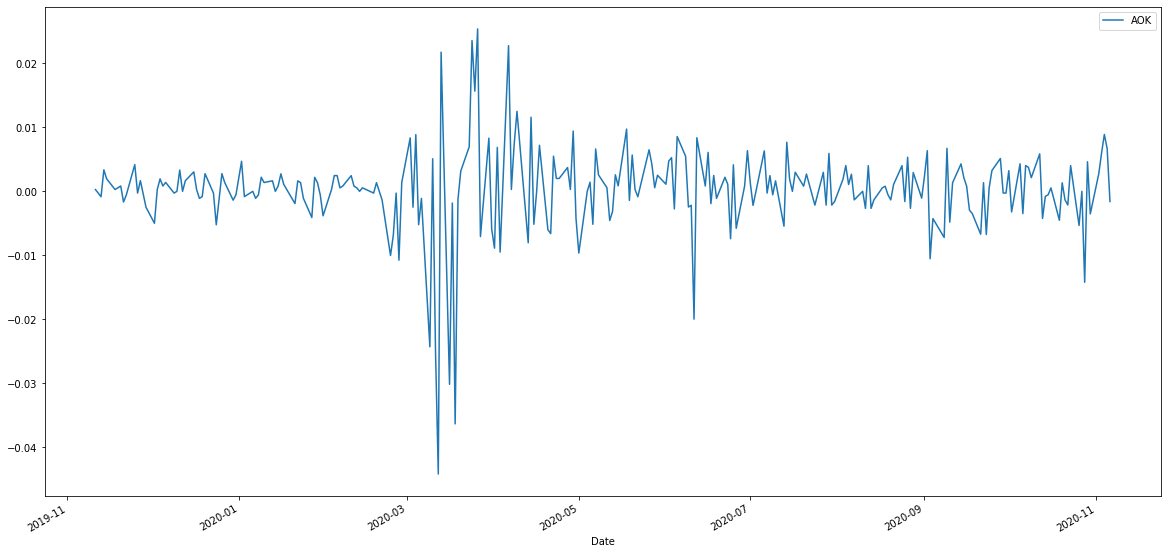

In [71]:
# Plot daily returns of AOK ETF's

daily_returns_aok.plot(figsize = (20,10))

### 2. AOM - iShares Core Moderate ETF Allocation

In [59]:
# Calculate daily returns

daily_returns_aom = aom_returns.pct_change()
daily_returns_aom.head(10)

,AOM
Date,
2019-11-08,NaN
2019-11-11,-0.001264
2019-11-12,0.000253
2019-11-13,0.001771
2019-11-14,0.000505
2019-11-15,0.003534
2019-11-18,0.000252
2019-11-19,-0.001006
2019-11-20,0.000755


In [66]:

# Cleaning nulls from DataFrame by dropping

daily_returns_aom.dropna(inplace = True)
daily_returns_aom.head(10)

,AOM
Date,
2019-11-11,-0.001264
2019-11-12,0.000253
2019-11-13,0.001771
2019-11-14,0.000505
2019-11-15,0.003534
2019-11-18,0.000252
2019-11-19,-0.001006
2019-11-20,0.000755
2019-11-21,-0.001258


### Plot the daily returns

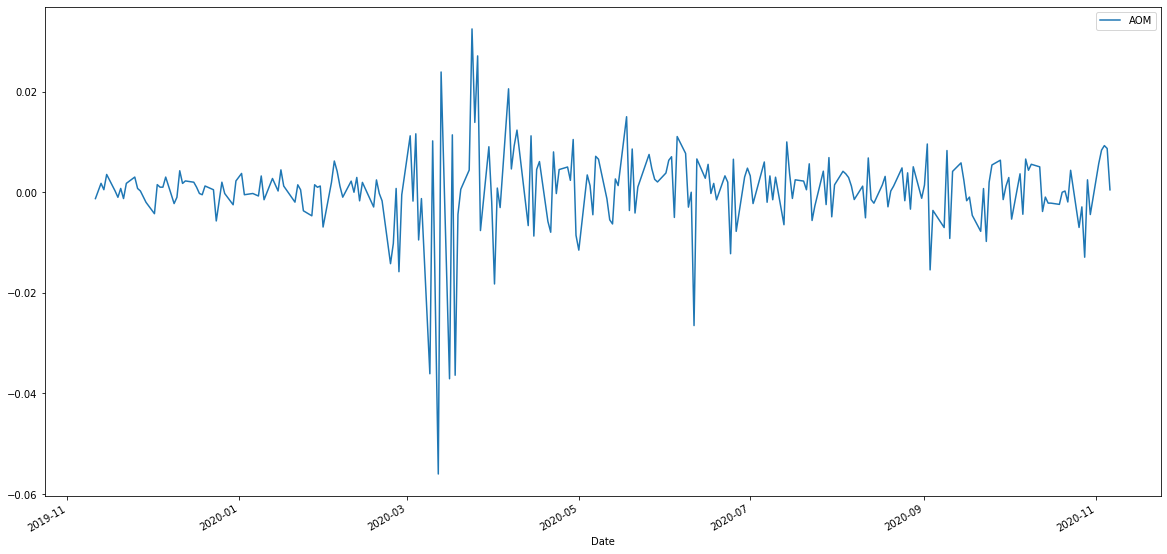

In [72]:
# Plot daily returns of AOM ETF's

daily_returns_aom.plot(figsize = (20,10))

### 3. AOR - iShares Core Growth ETF Allocation

In [60]:
# Calculate daily returns

daily_returns_aor = aor_returns.pct_change()
daily_returns_aor.head(10)

,AOR
Date,
2019-11-08,NaN
2019-11-11,-0.001491
2019-11-12,0.000000
2019-11-13,0.000213
2019-11-14,0.000640
2019-11-15,0.002771
2019-11-18,0.002126
2019-11-19,-0.000212
2019-11-20,-0.001910


In [65]:

# Cleaning nulls from DataFrame by dropping

daily_returns_aor.dropna(inplace = True)
daily_returns_aor.head(10)

,AOR
Date,
2019-11-11,-0.001491
2019-11-12,0.000000
2019-11-13,0.000213
2019-11-14,0.000640
2019-11-15,0.002771
2019-11-18,0.002126
2019-11-19,-0.000212
2019-11-20,-0.001910
2019-11-21,-0.001276


### Plot the daily returns

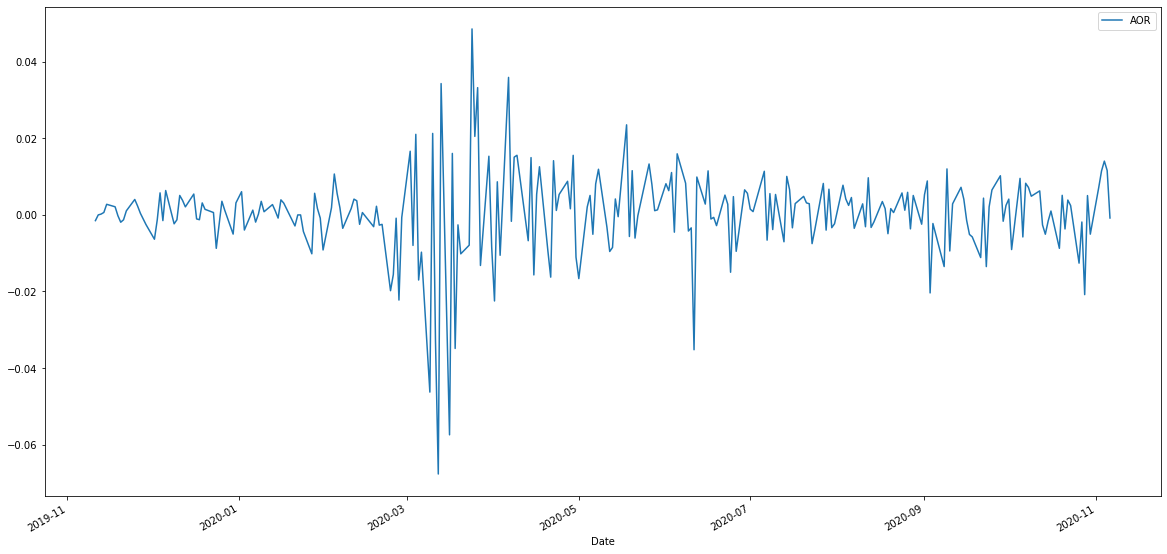

In [73]:
# Plot daily returns of AOR ETF's

daily_returns_aor.plot(figsize = (20,10))

### 4. AOA - iShares Core Aggressive ETF Allocation

In [61]:
# Calculate daily returns

daily_returns_aoa = aoa_returns.pct_change()
daily_returns_aoa.head(10)

,AOA
Date,
2019-11-08,NaN
2019-11-11,-0.001766
2019-11-12,-0.001062
2019-11-13,0.000531
2019-11-14,0.000531
2019-11-15,0.005131
2019-11-18,0.000704
2019-11-19,0.000352
2019-11-20,-0.003693


In [64]:

# Cleaning nulls from DataFrame by dropping

daily_returns_aoa.dropna(inplace = True)
daily_returns_aoa.head(10)

,AOA
Date,
2019-11-11,-0.001766
2019-11-12,-0.001062
2019-11-13,0.000531
2019-11-14,0.000531
2019-11-15,0.005131
2019-11-18,0.000704
2019-11-19,0.000352
2019-11-20,-0.003693
2019-11-21,-0.000882


### Plot the daily returns

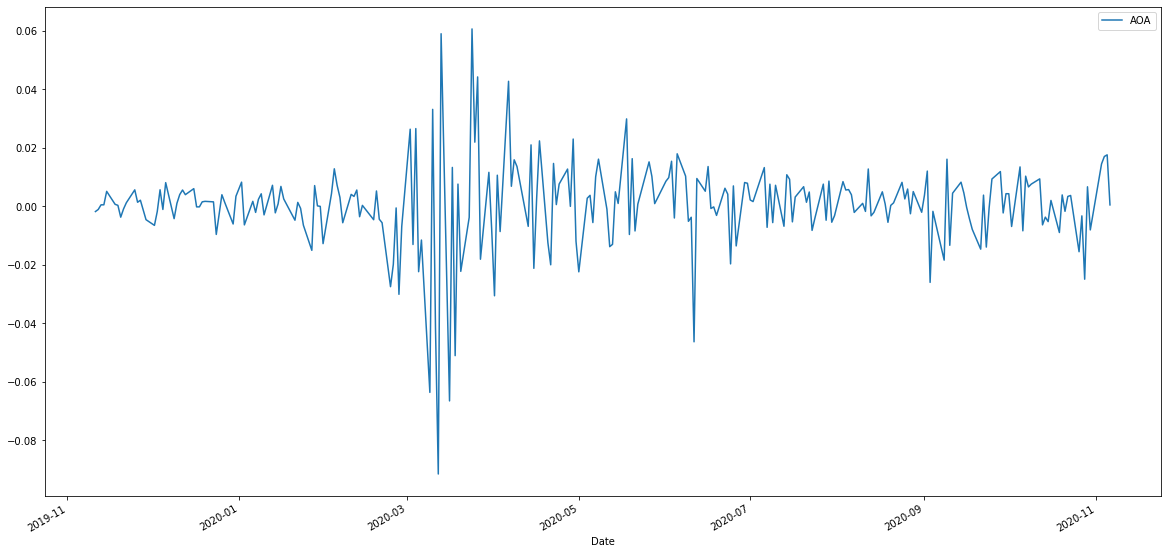

In [74]:
# Plot daily returns of AOA ETF's

daily_returns_aoa.plot(figsize = (20,10))

### 5. ITOT - iShares Core S&P Total U.S. Stock Market ETF Allocation

In [62]:
# Calculate daily returns

daily_returns_itot = itot_returns.pct_change()
daily_returns_itot.head(10)

,ITOT
Date,
2019-11-08,NaN
2019-11-11,-0.001575
2019-11-12,0.001147
2019-11-13,0.000859
2019-11-14,0.001288
2019-11-15,0.007003
2019-11-18,0.000568
2019-11-19,0.000426
2019-11-20,-0.003686


In [63]:

# Cleaning nulls from DataFrame by dropping

daily_returns_itot.dropna(inplace = True)
daily_returns_itot.head(10)

,ITOT
Date,
2019-11-11,-0.001575
2019-11-12,0.001147
2019-11-13,0.000859
2019-11-14,0.001288
2019-11-15,0.007003
2019-11-18,0.000568
2019-11-19,0.000426
2019-11-20,-0.003686
2019-11-21,-0.001423


### Plot the daily returns

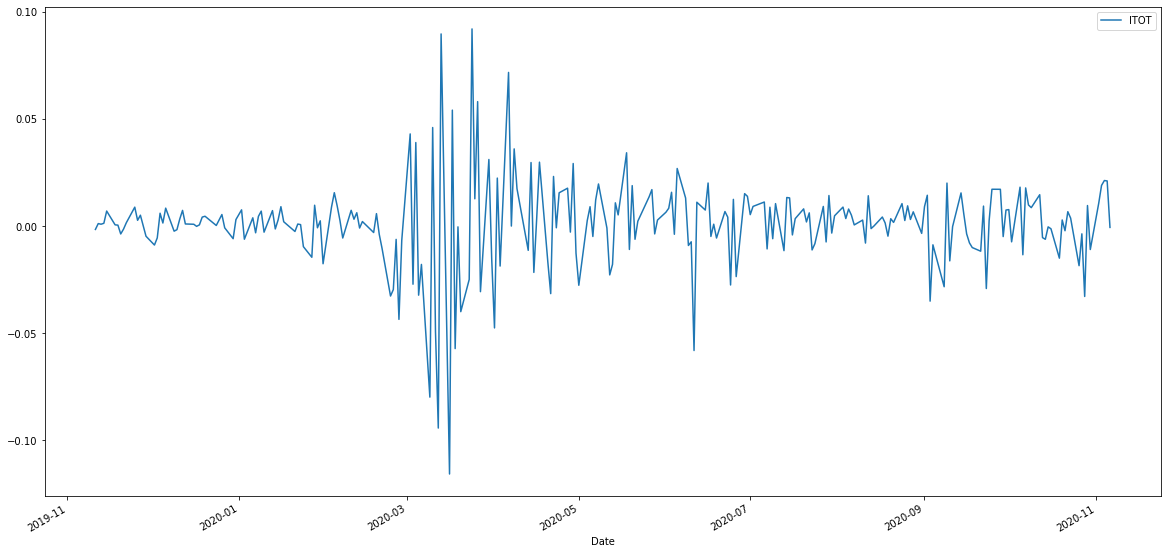

In [75]:
# Plot daily returns of ITOT ETF's

daily_returns_itot.plot(figsize = (20,10))

### Calculate daily returns for all the 5 ETF's together.

In [88]:
# Calculate daily returns

daily_returns_etf = the_portfolio.pct_change()
daily_returns_etf.head(10)

,AOK,AOM,AOR,AOA,ITOT
Date,,,,,
2019-11-08,NaN,NaN,NaN,NaN,NaN
2019-11-11,0.000279,-0.001264,-0.001491,-0.001766,-0.001575
2019-11-12,-0.000279,0.000253,0.000000,-0.001062,0.001147
2019-11-13,-0.000838,0.001771,0.000213,0.000531,0.000859
2019-11-14,0.003354,0.000505,0.000640,0.000531,0.001288
2019-11-15,0.001950,0.003534,0.002771,0.005131,0.007003
2019-11-18,0.000278,0.000252,0.002126,0.000704,0.000568
2019-11-19,0.000556,-0.001006,-0.000212,0.000352,0.000426
2019-11-20,0.000833,0.000755,-0.001910,-0.003693,-0.003686


In [89]:
# Cleaning nulls from DataFrame by dropping

daily_returns_etf.dropna(inplace = True)
daily_returns_etf.head(10)

,AOK,AOM,AOR,AOA,ITOT
Date,,,,,
2019-11-11,0.000279,-0.001264,-0.001491,-0.001766,-0.001575
2019-11-12,-0.000279,0.000253,0.000000,-0.001062,0.001147
2019-11-13,-0.000838,0.001771,0.000213,0.000531,0.000859
2019-11-14,0.003354,0.000505,0.000640,0.000531,0.001288
2019-11-15,0.001950,0.003534,0.002771,0.005131,0.007003
2019-11-18,0.000278,0.000252,0.002126,0.000704,0.000568
2019-11-19,0.000556,-0.001006,-0.000212,0.000352,0.000426
2019-11-20,0.000833,0.000755,-0.001910,-0.003693,-0.003686
2019-11-21,-0.001665,-0.001258,-0.001276,-0.000882,-0.001423


### Plot the daily returns

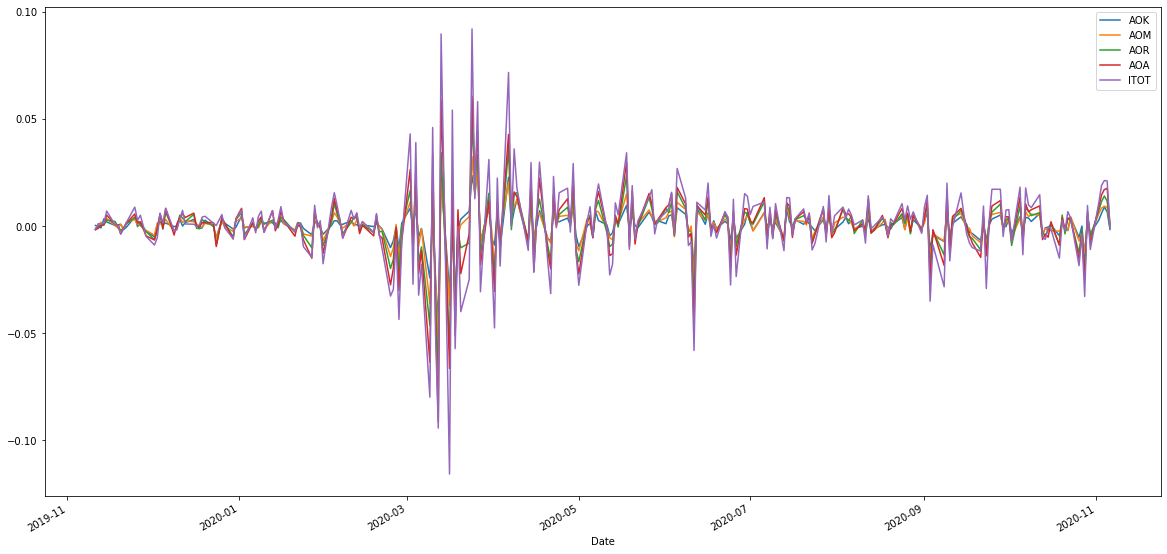

In [90]:
# Plot daily returns of 5 ETF's together

daily_returns_etf.plot(figsize = (20,10))

### Calculate and Plot cumulative returns for each ETF.

### 1. AOK - iShares Core Conservative ETF Allocation

                 AOK
Date                
2020-11-02  1.030718
2020-11-03  1.036861
2020-11-04  1.046076
2020-11-05  1.053058
2020-11-06  1.051382


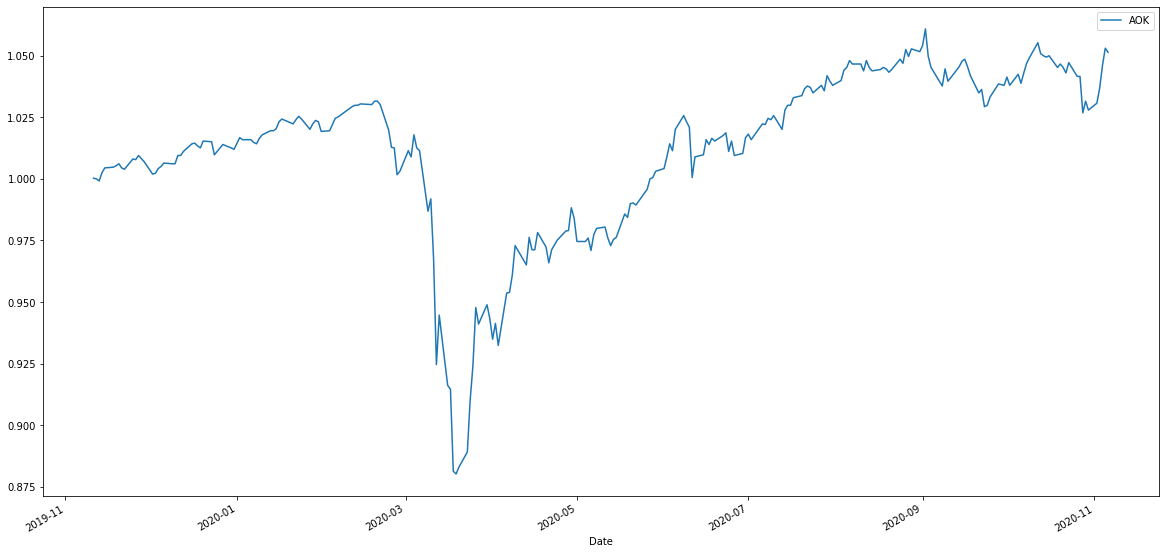

In [76]:
# Calculate cumulative returns of AOK

df_cum_returns_aok = (1+ daily_returns_aok).cumprod()

# Plot cumulative returns

df_cum_returns_aok.plot(figsize = (20,10))

print(df_cum_returns_aok.tail())

### 2. AOM - iShares Core Moderate ETF Allocation

                 AOM
Date                
2020-11-02  1.027553
2020-11-03  1.036148
2020-11-04  1.045753
2020-11-05  1.054853
2020-11-06  1.055359


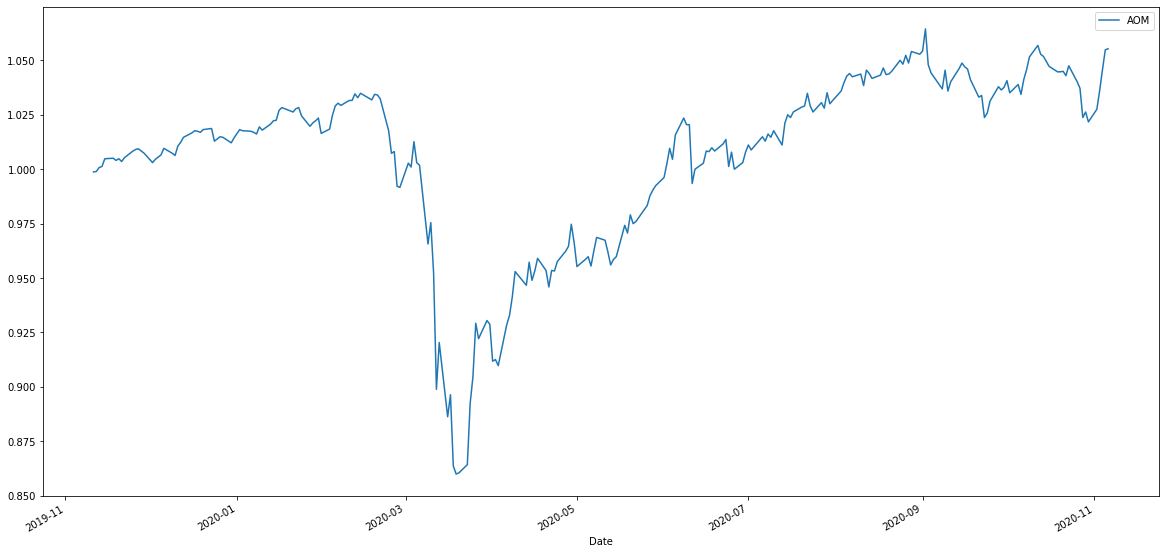

In [77]:
# Calculate cumulative returns of AOM

df_cum_returns_aom = (1+ daily_returns_aom).cumprod()

# Plot cumulative returns

df_cum_returns_aom.plot(figsize = (20,10))

print(df_cum_returns_aom.tail())

### 3. AOR - iShares Core Growth ETF Allocation

                 AOR
Date                
2020-11-02  1.019173
2020-11-03  1.030890
2020-11-04  1.045377
2020-11-05  1.057520
2020-11-06  1.056668


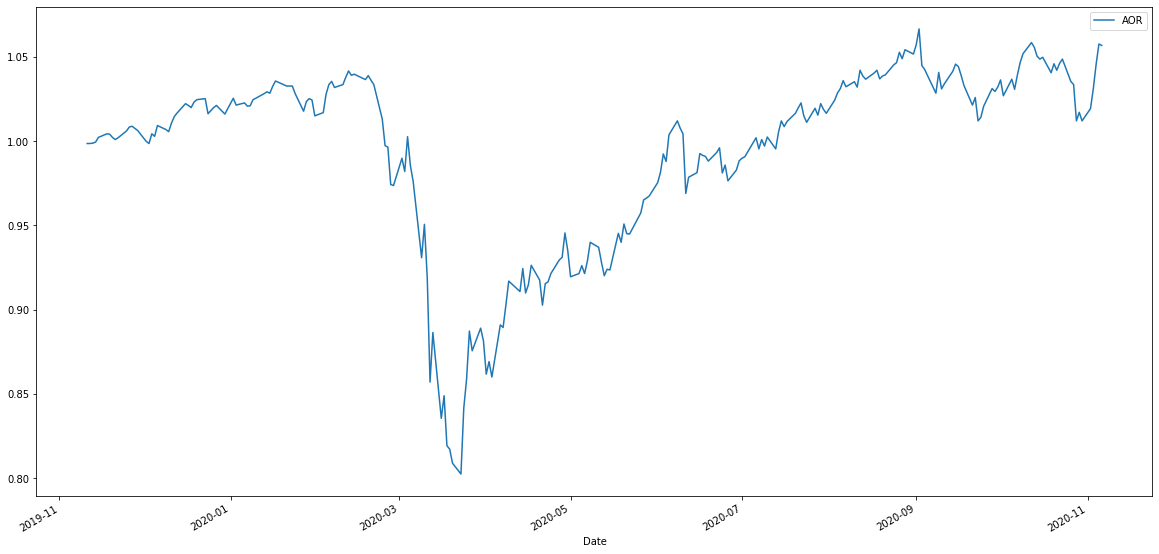

In [104]:
# Calculate cumulative returns of AOR

df_cum_returns_aor = (1+ daily_returns_aor).cumprod()

# Plot cumulative returns

df_cum_returns_aor.plot(figsize = (20,10))

print(df_cum_returns_aor.tail())

### 4. AOA - iShares Core Aggressive ETF Allocation

                 AOA
Date                
2020-11-02  1.010950
2020-11-03  1.025609
2020-11-04  1.043094
2020-11-05  1.061462
2020-11-06  1.061992


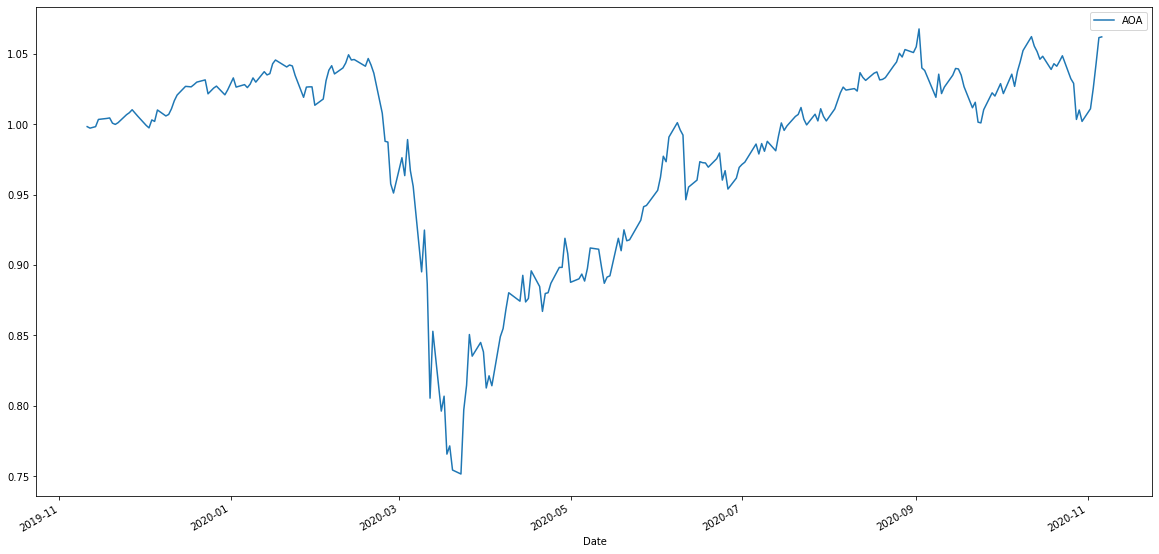

In [79]:
# Calculate cumulative returns of AOA

df_cum_returns_aoa = (1+ daily_returns_aoa).cumprod()

# Plot cumulative returns

df_cum_returns_aoa.plot(figsize = (20,10))

print(df_cum_returns_aoa.tail())

### 5. ITOT - iShares Core S&P Total U.S. Stock Market ETF Allocation

                ITOT
Date                
2020-11-02  1.071439
2020-11-03  1.091768
2020-11-04  1.114961
2020-11-05  1.138440
2020-11-06  1.137724


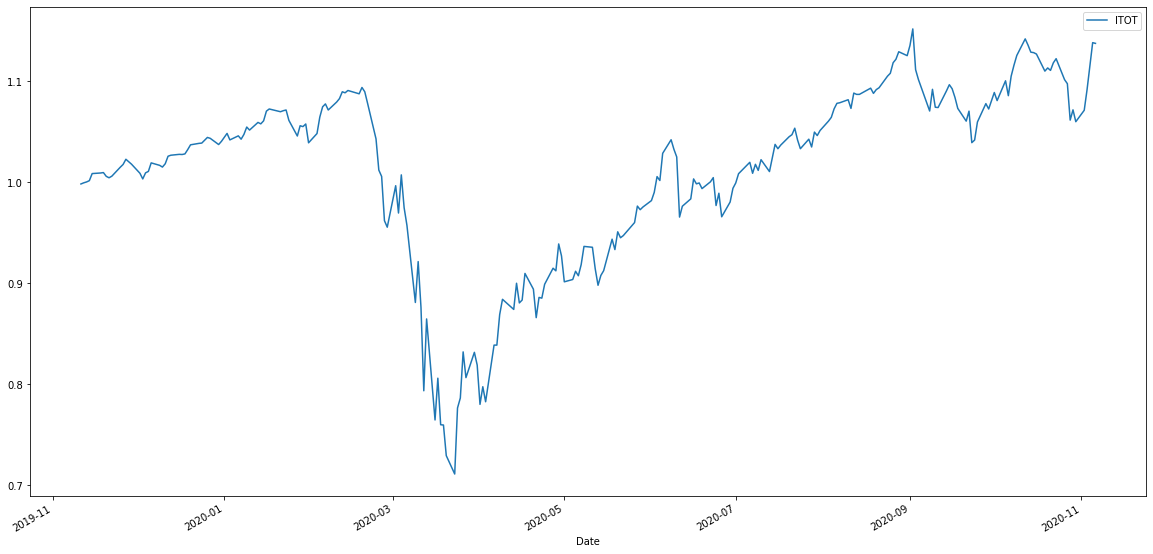

In [80]:
# Calculate cumulative returns of ITOT

df_cum_returns_itot = (1+ daily_returns_itot).cumprod()

# Plot cumulative returns

df_cum_returns_itot.plot(figsize = (20,10))

print(df_cum_returns_itot.tail())

### Calculate and Plot cumulative returns for all 5 ETF's together.

                 AOK       AOM       AOR       AOA      ITOT
Date                                                        
2020-11-02  1.030718  1.027553  1.019173  1.010950  1.071439
2020-11-03  1.036861  1.036148  1.030890  1.025609  1.091768
2020-11-04  1.046076  1.045753  1.045377  1.043094  1.114961
2020-11-05  1.053058  1.054853  1.057520  1.061462  1.138440
2020-11-06  1.051382  1.055359  1.056668  1.061992  1.137724


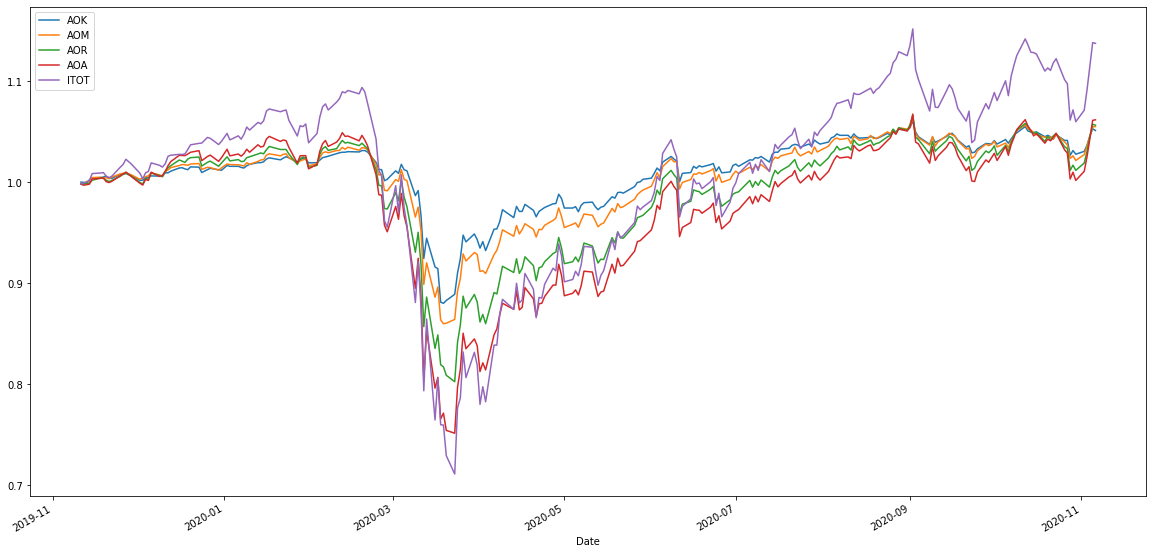

In [91]:
# Calculate cumulative returns of all ETF's together

df_cum_returns_etf = (1+ daily_returns_etf).cumprod()

# Plot cumulative returns

df_cum_returns_etf.plot(figsize = (20,10))

print(df_cum_returns_etf.tail())

##### ITOT - iShares Core S&P Total U.S. Stock Market ETF has the highest return compared to all other ETF's.

### ii). Risk Analysis

### Create a box plot for each ETF

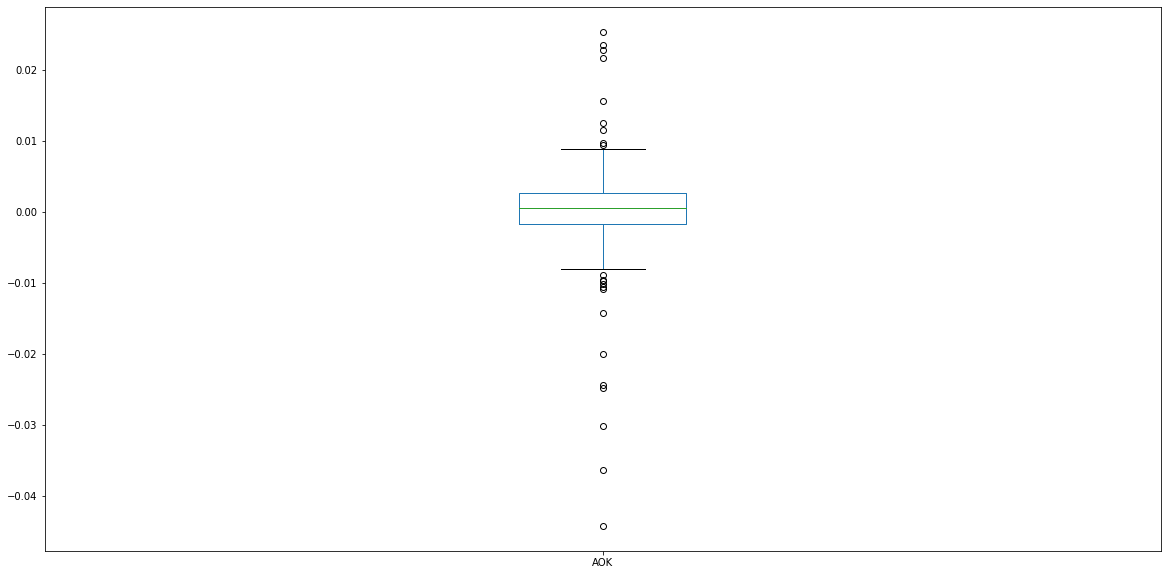

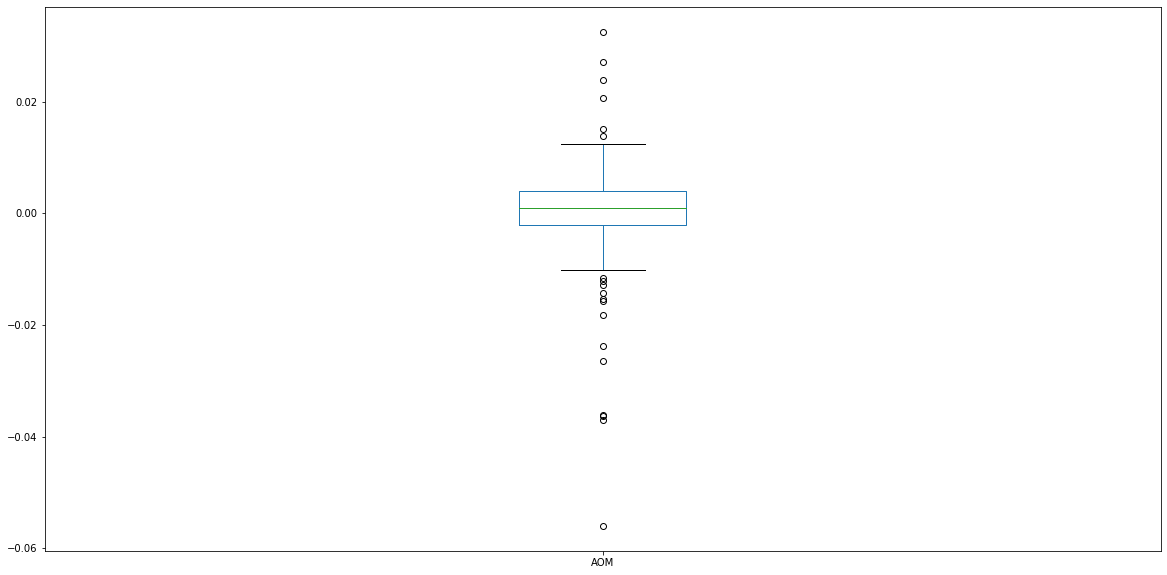

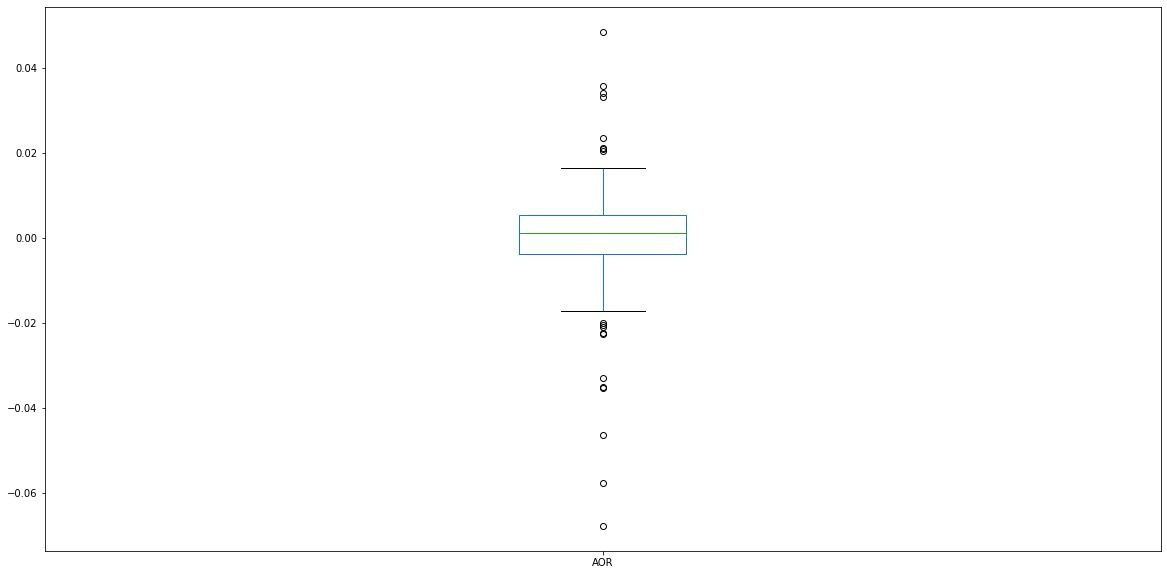

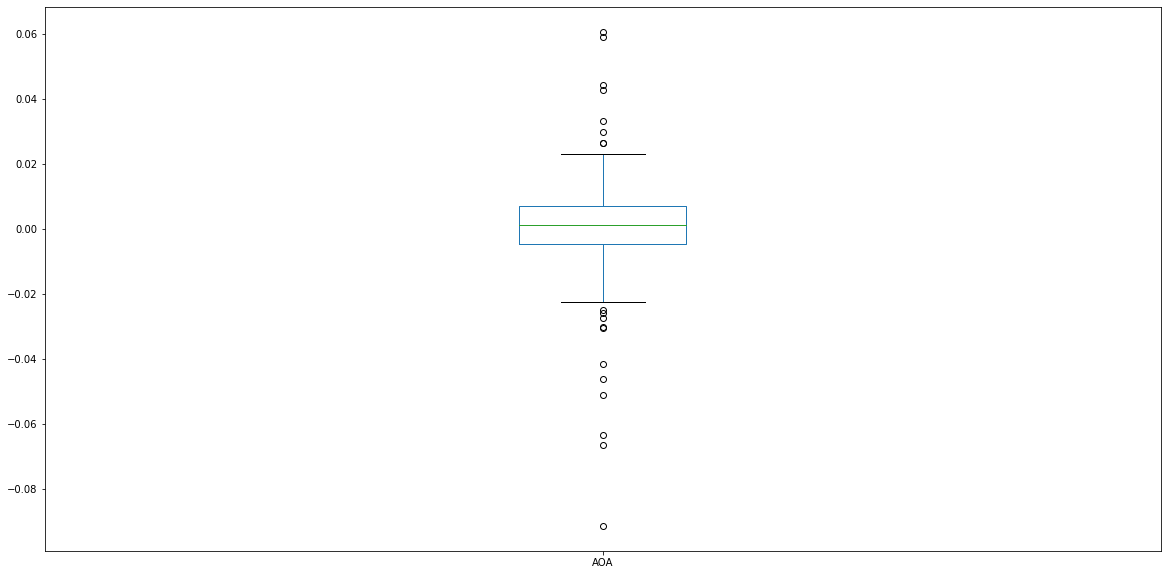

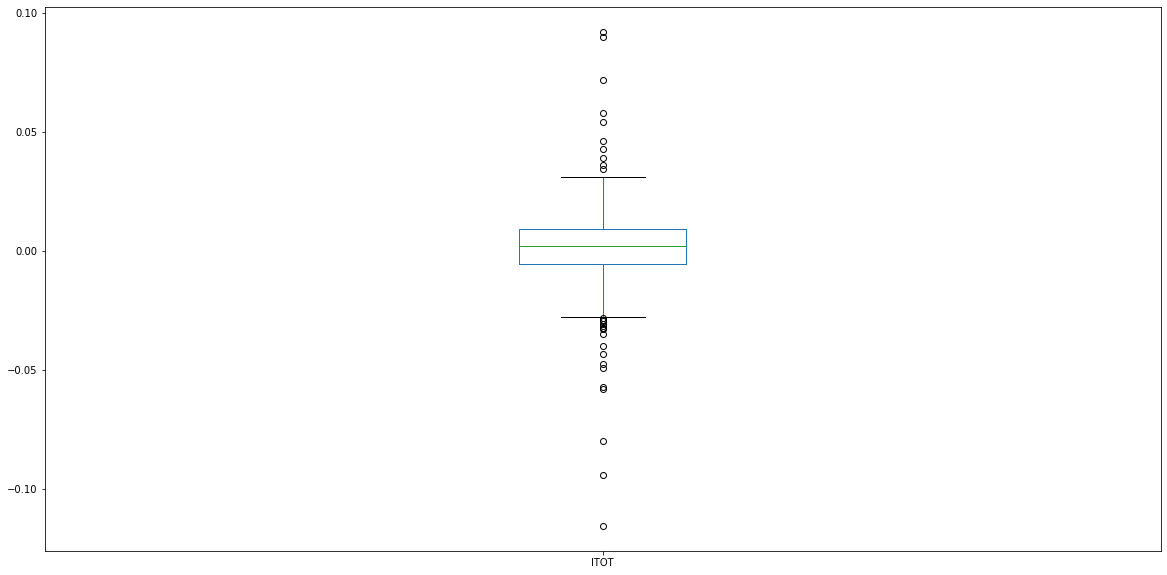

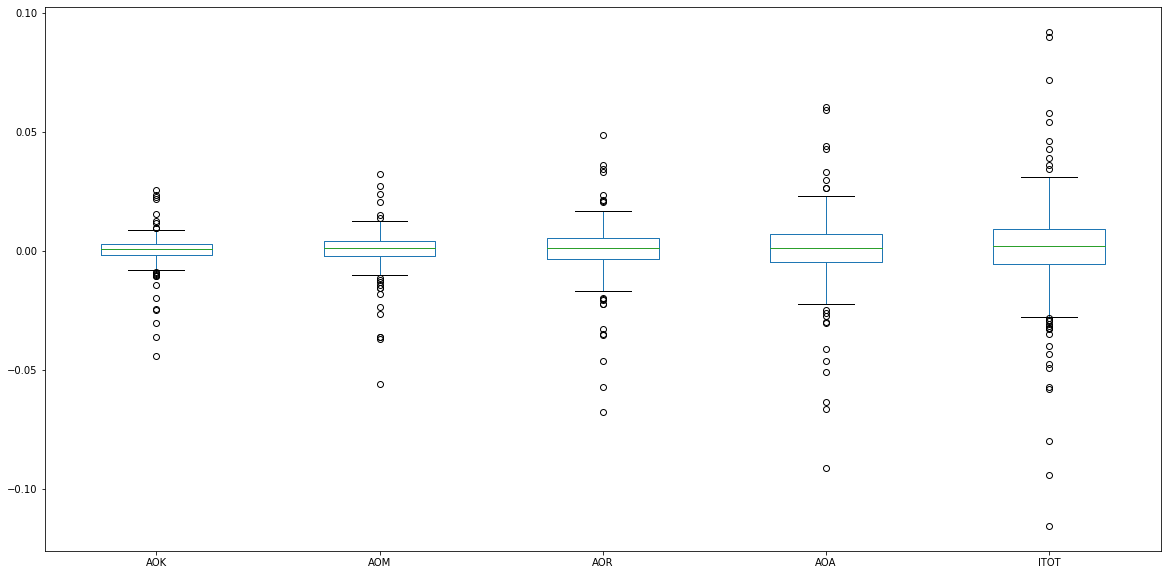

In [92]:
# Box plot to visually show risk

daily_returns_aok.plot(kind = "box", figsize = (20,10))

daily_returns_aom.plot(kind = "box", figsize = (20,10))

daily_returns_aor.plot(kind = "box", figsize = (20,10))

daily_returns_aoa.plot(kind = "box", figsize = (20,10))

daily_returns_itot.plot(kind = "box", figsize = (20,10))

# box plot for all etf's together

daily_returns_etf.plot(kind = "box", figsize = (20,10))

### Calculate Standard Deviations

In [94]:

# Calculate the daily standard deviations of all 5 ETF's

df_daily_std_etf = pd.DataFrame(daily_returns_etf.std()).rename(columns = {0:"std"})
df_daily_std_etf

,std
AOK,0.007042
AOM,0.008517
AOR,0.011811
AOA,0.015426
ITOT,0.021495


##### ITOT - iShares Core S&P Total U.S. Stock Market ETF is the riskiest ETF with highest standard deviation

### Calculate the Annualized Standard Deviation

In [99]:
# Calculate the annualized `std` of all ETF's

df_annualized_std_etf = df_daily_std_etf*np.sqrt(252)
df_annualized_std_etf


,std
AOK,0.111788
AOM,0.135197
AOR,0.187500
AOA,0.244877
ITOT,0.341227


## Rolling Statistics

### Calculate and plot rolling std for all 5 ETF's with 21-day window

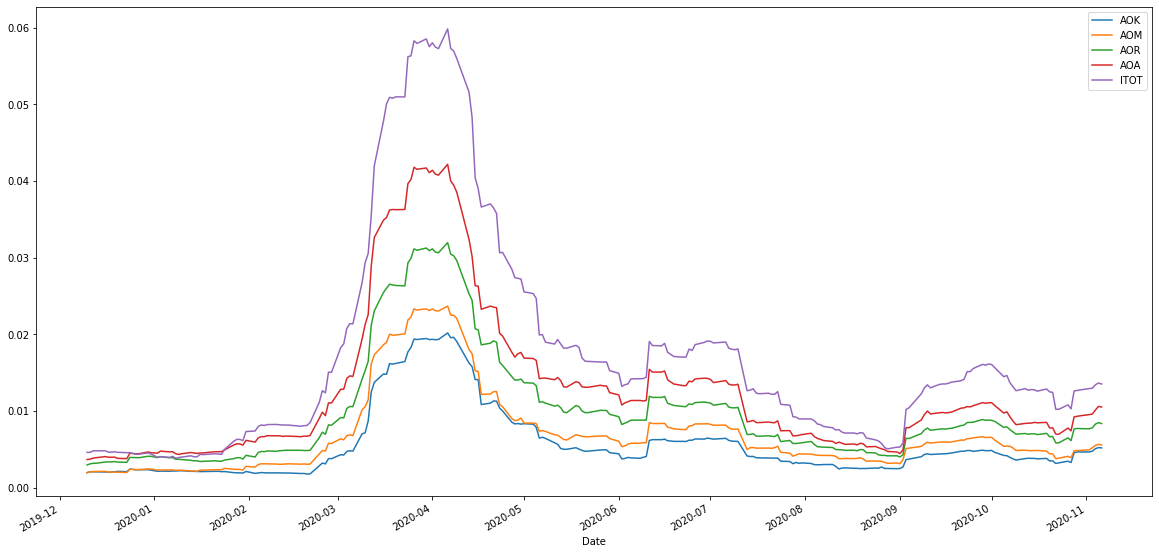

In [100]:
# Calculate and Plot the rolling standard deviation for all portfolios using a 21-day window

daily_returns_etf.rolling(window=21).std().plot(figsize=(20,10))


## Correlation

In [101]:
# Calculate the correlation

correlation = daily_returns_etf.corr()
correlation

,AOK,AOM,AOR,AOA,ITOT
AOK,1.000000,0.959615,0.939312,0.934334,0.884777
AOM,0.959615,1.000000,0.967439,0.964898,0.923387
AOR,0.939312,0.967439,1.000000,0.986354,0.967287
AOA,0.934334,0.964898,0.986354,1.000000,0.967638
ITOT,0.884777,0.923387,0.967287,0.967638,1.000000


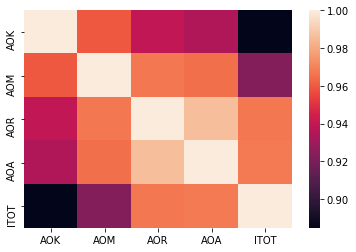

In [103]:
# Display de correlation matrix

import seaborn as sns
sns.heatmap(correlation, )

##### AOA - iShares Core Aggressive ETF and AOA - iShares Core Growth ETF are highly correlated. 

### Sharpe Ratios

In [106]:
# Annualized Sharpe Ratios

sharpe_ratios = daily_returns_etf.mean()*252/(daily_returns_etf.std()*np.sqrt(252))
sharpe_ratios

AOK     0.506179
AOM     0.468237
AOR     0.389494
AOA     0.370180
ITOT    0.551430
dtype: float64

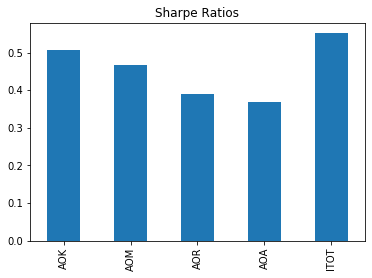

In [107]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [115]:
def BTR(pv,aok,start,end,shares,cash,rf=0):
    tickers = [AOK]
    aok_adj_close = get_adjusted_close(tickers,start,end)
    aok_pv = Portfolio_Value(aok_adj_close,shares,cash)
    aok_returns = daily_returns(aok_pv)
    port_returns = daily_returns(pv)
    covariance = np.cov(port_returns,aok_returns)[0][1]
    variance = np.var(aok_returns)
    beta = covariance/variance
    Treynor_Ratio = (cumulative_returns(pv) - rf)/beta
    return beta,Treynor_Ratio